# Time-Series Stationarity Requirements

In [1]:
import pandas as pd

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
series_df = pd.read_csv("data/daily-total-female-births.csv")

## Requirement \#1:
### The variable is not a function of time.

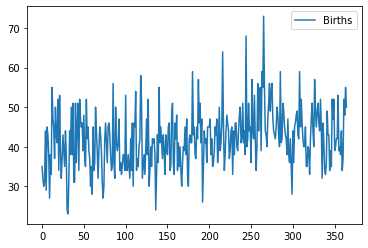

In [3]:
series_df.plot()

## Requirement \#2:
### The rolling mean doesn't change over time

In [24]:
slope = 0.1
series_df['Births_moving'] = [(slope * i) + birth for i, birth in enumerate(series_df['Births'].values)]

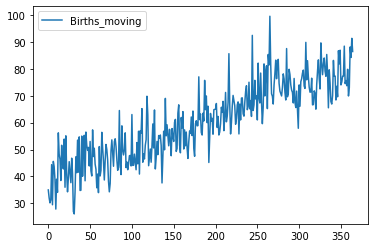

In [39]:
series_df['Births_moving'].plot()
plt.legend()
plt.show()

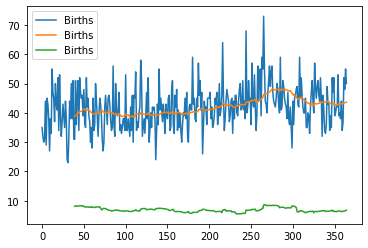

In [83]:
# Calculate rolling mean of original time-series.
rolling_mean = series_df['Births'].rolling(window = 40).mean()
rolling_std = series_df['Births'].rolling(window = 40).std()

# Plot for visualization purposes.
series_df['Births'].plot(label="Births stationary")
rolling_mean.plot(label="Rolling Mean")
rolling_std.plot(label="Rolling Stdev")
plt.legend()
plt.show()

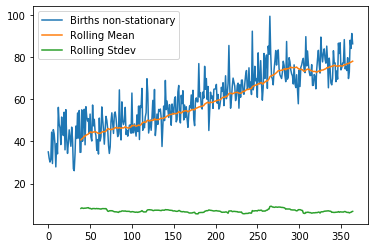

In [82]:
# Calculate rolling mean of non-stationary time-series.
rolling_mean = series_df['Births_moving'].rolling(window = 40).mean()
rolling_std = series_df['Births_moving'].rolling(window = 40).std()

# Plot for visualization purposes.
series_df['Births_moving'].plot(label="Births non-stationary")
rolling_mean.plot(label="Rolling Mean")
rolling_std.plot(label="Rolling Stdev")
plt.legend()
plt.show()

## Requirement \#3:
### The rolling standard deviation doesn't change over time (homoscedasticity)

In [74]:
slope = 0.1
series_df['Births_moving_std'] = [(slope * i) * birth for i, birth in enumerate(series_df['Births'].values)]

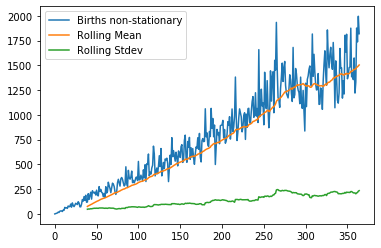

In [81]:
# Calculate rolling mean of monotonic-increasing std time-series.
rolling_mean = series_df['Births_moving_std'].rolling(window = 40).mean()
rolling_std = series_df['Births_moving_std'].rolling(window = 40).std()

# Plot for visualization purposes.
series_df['Births_moving_std'].plot(label="Births non-stationary")
rolling_mean.plot(label="Rolling Mean")
rolling_std.plot(label="Rolling Stdev")
plt.legend()
plt.show()

## Requirement \#4:
### The covariance between the ith and (i+m)th term in series isn't a function of time

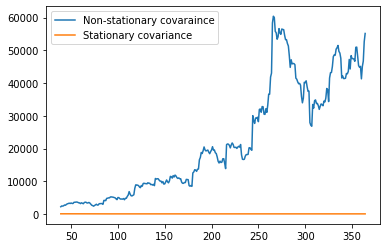

In [80]:
# Compare covariance between stationary and non-moving time series.
moving_cov = series_df['Births_moving_std'].rolling(window = 40).cov()
stat_cov = series_df['Births'].rolling(window = 40).cov()

moving_cov.plot(label="Non-stationary covaraince")
stat_cov.plot(label="Stationary covariance")
plt.legend()
plt.show()

## Requirement \#5:
### The Augmented Dicky-Fuller test has a p-value such that the hypothesis that the time-series is not stationary can be rejected.

In [43]:
from statsmodels.tsa.stattools import adfuller

In [50]:
print('p-value of Births time-series: %f' % adfuller(series_df['Births'])[1])

p-value of Births time-series: 0.000052


In [51]:
print('p-value of Births time-series: %f' % adfuller(series_df['Births_moving'])[1])

p-value of Births time-series: 0.681591
